<a href="https://colab.research.google.com/github/kinuthiaG/deep-learning-coursera/blob/master/Gradio_Pets_22_2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=red> 22-2-2025
### Practical Deep learning for Coders
## 3. Neural net foundations
### Notebooks for this lesson
### 1. [HaggingTace Spaces Pets repository](https://huggingface.co/spaces/jph00/pets/tree/main) train.ipynb


## Gradio Pets

In [1]:
!pwd

/content


In [2]:
from fastai.vision.all import *
import timm

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

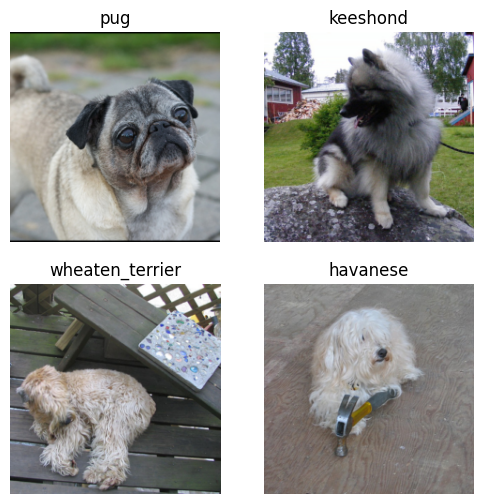

In [4]:
dls.show_batch(max_n=4)

In [5]:
learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy]).to_fp16()
learn.fine_tune(3)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.469692,0.316615,0.094723,0.905277,00:40


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.453182,0.281837,0.094046,0.905954,00:41
1,0.276562,0.247167,0.077808,0.922192,00:40
2,0.127519,0.226303,0.074425,0.925575,00:40


We could try a better model, based on [this analysis](https://www.kaggle.com/code/jhoward/which-image-models-are-best/). The convnext models work great!

In [6]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_atto_rms',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnext_zepto_rms',
 'convnext_zepto_rms_ols',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [7]:
learn2 = vision_learner(dls, 'convnext_tiny_in22k', metrics=[error_rate, accuracy]).to_fp16()
learn2.fine_tune(3)

/usr/local/lib/python3.11/dist-packages/timm/models/_factory.py:126: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.111119,0.259553,0.091340,0.908660,00:43


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.277188,0.197610,0.067659,0.932341,00:50
1,0.205629,0.169859,0.049391,0.950609,00:46
2,0.127691,0.154173,0.048714,0.951286,00:46


In [8]:
learn.export('model.pkl')